# **Fashion MNIST dataset**

The Fashion MNIST dataset is a popular resource for getting started with machine learning, especially image classification using Convolutional Neural Networks (CNNs). It's designed as an alternative to the classic MNIST dataset of handwritten digits, offering a slightly more complex image recognition task. Here's a breakdown of the Fashion MNIST dataset in TensorFlow:

**Content:**

* **Images:** The dataset consists of 70,000 grayscale images, each 28x28 pixels in size.
* **Labels:** Each image belongs to one of 10 different clothing categories. These categories include items like T-shirts, trousers, dresses, shoes, and bags.

**Split:**

* **Training Set:** 60,000 images are dedicated for training your machine learning model.
* **Test Set:** The remaining 10,000 images are used for evaluating the model's performance after training.

**Loading in TensorFlow:**

TensorFlow provides a convenient way to load the Fashion MNIST dataset using the `tf.keras.datasets.fashion_mnist.load_data()` function. This function returns two separate NumPy arrays: one for the training images and another for the training labels. There's a similar function to load the test set as well.

**Uses:**

* The Fashion MNIST dataset is ideal for beginners to practice building and training CNNs for image classification.
* It allows you to learn the core concepts of data preprocessing, model building, training, and evaluation in a controlled environment.
* Once comfortable, you can progress to more complex image datasets for real-world applications.


Here are some helpful resources to learn more about the Fashion MNIST dataset and how to use it with TensorFlow:

* TensorFlow Tutorial on Fashion MNIST Classification: [https://www.tensorflow.org/tutorials/keras/classification](https://www.tensorflow.org/tutorials/keras/classification)
* TensorFlow Documentation on `tf.keras.datasets.fashion_mnist.load_data()`: [https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)

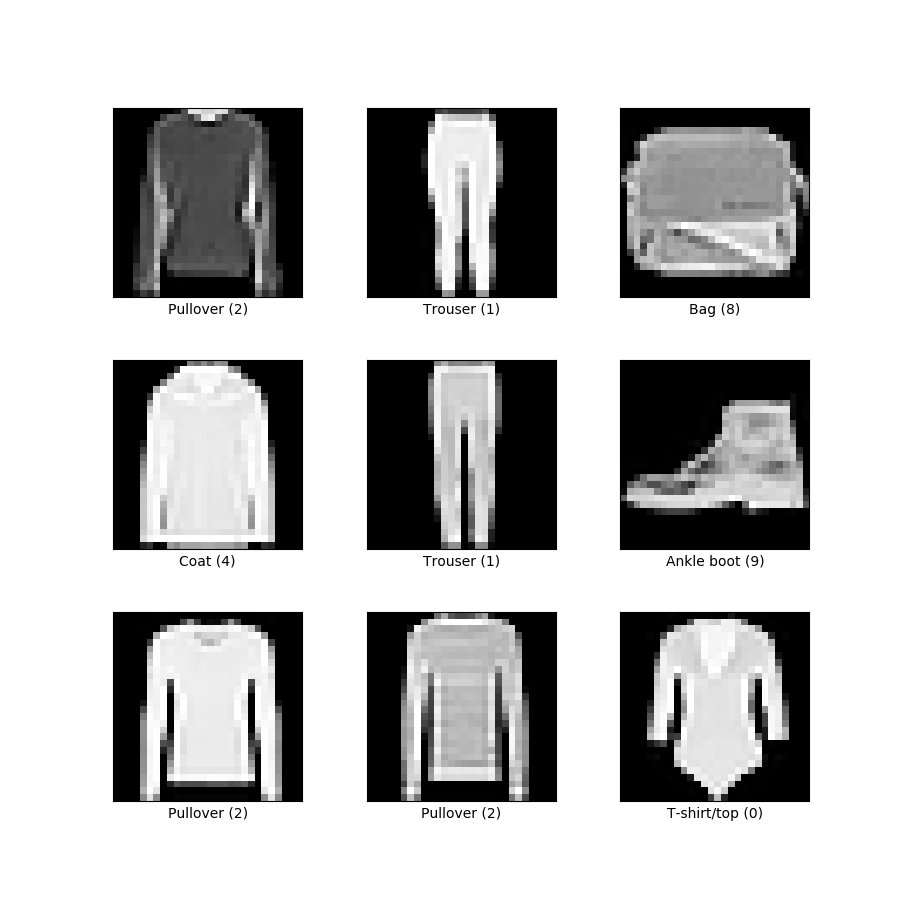

Image source : https://www.tensorflow.org/datasets/catalog/fashion_mnist

## Before applying the `Batch Normalization`

In [ ]:
#import the libraries
import os
import time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("fivethirtyeight")
%load_ext tensorboard

In [ ]:
#loading the data of fasion mnist
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#convert or scale the data between 0 and 1 by dividing 255
#because data is unsigned data and it ranged from 0 to 255
X_train_full = X_train_full/255.
X_test = X_test/255.

#create the validation and test dataset
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#create the layers of model
tf.random.set_seed(47) #prevent the random values from being shuggle everytime
np.random.seed(47)

LAYERS = (tf.keras.layers.Flatten(input_shape = [28, 28]),
          tf.keras.layers.Dense(300, kernel_initializer = "he_normal"),
          tf.keras.layers.LeakyReLU(),
          tf.keras.layers.Dense(100, kernel_initializer = "he_normal"),
          tf.keras.layers.LeakyReLU(),
          tf.keras.layers.Dense(10, activation = "softmax"))

#create the model with above layers
model = tf.keras.models.Sequential(LAYERS)

In [ ]:
#compile the model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
              metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 

In [ ]:
#now training and calculating the training time for comparision
#starting time
start = time.time()

#fit the model
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid),
                    verbose = 2)

#ending time
end = time.time()

#total time taken
print(f"runtime of program is {end - start}")

Epoch 1/10
1719/1719 - 7s - loss: 1.2388 - accuracy: 0.6154 - val_loss: 0.8637 - val_accuracy: 0.7224 - 7s/epoch - 4ms/step
Epoch 2/10
1719/1719 - 4s - loss: 0.7863 - accuracy: 0.7397 - val_loss: 0.7054 - val_accuracy: 0.7658 - 4s/epoch - 2ms/step
Epoch 3/10
1719/1719 - 5s - loss: 0.6793 - accuracy: 0.7733 - val_loss: 0.6315 - val_accuracy: 0.7972 - 5s/epoch - 3ms/step
Epoch 4/10
1719/1719 - 4s - loss: 0.6205 - accuracy: 0.7947 - val_loss: 0.5858 - val_accuracy: 0.8088 - 4s/epoch - 2ms/step
Epoch 5/10
1719/1719 - 4s - loss: 0.5822 - accuracy: 0.8070 - val_loss: 0.5565 - val_accuracy: 0.8192 - 4s/epoch - 2ms/step
Epoch 6/10
1719/1719 - 6s - loss: 0.5547 - accuracy: 0.8156 - val_loss: 0.5328 - val_accuracy: 0.8240 - 6s/epoch - 3ms/step
Epoch 7/10
1719/1719 - 5s - loss: 0.5341 - accuracy: 0.8214 - val_loss: 0.5154 - val_accuracy: 0.8274 - 5s/epoch - 3ms/step
Epoch 8/10
1719/1719 - 5s - loss: 0.5177 - accuracy: 0.8258 - val_loss: 0.5005 - val_accuracy: 0.8354 - 5s/epoch - 3ms/step
Epoch 9/

### Conclusion:
- runtime of the program is 82.94
- accuracy of the program is 84.04%

## After applying the `Batch Normalization`

In [ ]:
#deleting the previous model
del model

In [ ]:
#defining the model with batch normalization
LAYERS_BN = [
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation = "softmax")
]

#create the model with above layers
model = tf.keras.models.Sequential(LAYERS_BN)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 batch_normalization_2 (Bat  (None, 300)              

In [ ]:
bn1 = model.layers[1]
bn1

In [ ]:
for variable in bn1.variables:
  print(variable.name, variable.trainable)

batch_normalization/gamma:0 True
batch_normalization/beta:0 True
batch_normalization/moving_mean:0 False
batch_normalization/moving_variance:0 False


In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
              metrics = ["accuracy"])

In [ ]:
#now training and calculating the training time for comparision
#starting time
start = time.time()

#fit the model
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid),
                    verbose = 2)

#ending time
end = time.time()

#total time taken
print(f"runtime of program is {end - start}")

Epoch 1/10
1719/1719 - 10s - loss: 0.7956 - accuracy: 0.7256 - val_loss: 0.5145 - val_accuracy: 0.8208 - 10s/epoch - 6ms/step
Epoch 2/10
1719/1719 - 8s - loss: 0.5410 - accuracy: 0.8113 - val_loss: 0.4452 - val_accuracy: 0.8474 - 8s/epoch - 5ms/step
Epoch 3/10
1719/1719 - 8s - loss: 0.4816 - accuracy: 0.8302 - val_loss: 0.4144 - val_accuracy: 0.8586 - 8s/epoch - 5ms/step
Epoch 4/10
1719/1719 - 7s - loss: 0.4516 - accuracy: 0.8410 - val_loss: 0.3973 - val_accuracy: 0.8642 - 7s/epoch - 4ms/step
Epoch 5/10
1719/1719 - 9s - loss: 0.4309 - accuracy: 0.8467 - val_loss: 0.3827 - val_accuracy: 0.8676 - 9s/epoch - 5ms/step
Epoch 6/10
1719/1719 - 9s - loss: 0.4111 - accuracy: 0.8554 - val_loss: 0.3733 - val_accuracy: 0.8720 - 9s/epoch - 5ms/step
Epoch 7/10
1719/1719 - 9s - loss: 0.3987 - accuracy: 0.8591 - val_loss: 0.3673 - val_accuracy: 0.8756 - 9s/epoch - 5ms/step
Epoch 8/10
1719/1719 - 9s - loss: 0.3861 - accuracy: 0.8629 - val_loss: 0.3614 - val_accuracy: 0.8778 - 9s/epoch - 5ms/step
Epoch 

### Conclusion :
- rutime for the program is 143.73 sec
- accuracy for the program is 88.02%

**Note** : As we can see the although it has taken a little long time due to some extra parameters added it has imporved the accuracy score after applying the batch normalization.
- score after applying batch normalization in big problems it perform more.